In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from matplotlib.patheffects import Stroke, Normal, withStroke
import matplotlib.patches as patches
from matplotlib import rcParams
from highlight_text import ax_text, fig_text
import pandas as pd
from statsbombpy import sb

from PIL import Image
import urllib
import os

In [2]:
df = sb.competitions()

credentials were not supplied. open data access only


In [3]:
mundial = sb.matches(competition_id=43, season_id=106)

credentials were not supplied. open data access only


In [4]:
partidos_arg = mundial[(mundial['home_team'] == 'Argentina') | (mundial['away_team'] == 'Argentina')]
partidos_arg

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,data_version,shot_fidelity_version,xy_fidelity_version
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,available,2023-07-30T07:46:05.382784,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,available,2023-03-30T20:22:22.475740,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,available,2023-02-20T07:27:19.374380,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,1.1.0,2,2
11,3857264,2022-11-30,21:00:00.000,International - FIFA World Cup,2022,Poland,Argentina,0,2,available,available,2023-07-25T08:24:09.695404,2023-07-25T09:10:13.832053,3,Group Stage,Stadium 974,Danny Desmond Makkelie,1.1.0,2,2
13,3857289,2022-11-26,21:00:00.000,International - FIFA World Cup,2022,Argentina,Mexico,2,0,available,available,2023-02-08T14:48:48.516858,2023-06-20T11:57:08.547882,2,Group Stage,Lusail Stadium,Daniele Orsato,1.1.0,2,2
19,3869519,2022-12-13,21:00:00.000,International - FIFA World Cup,2022,Argentina,Croatia,3,0,available,available,2023-04-19T06:53:52.197711,2023-04-26T22:32:37.808359,6,Semi-finals,Lusail Stadium,Daniele Orsato,1.1.0,2,2
37,3857300,2022-11-22,12:00:00.000,International - FIFA World Cup,2022,Argentina,Saudi Arabia,1,2,available,available,2023-06-18T15:28:07.620153,2023-06-19T15:59:46.628887,1,Group Stage,Lusail Stadium,Slavko Vinčić,1.1.0,2,2


In [6]:
df_arg = pd.DataFrame()
match_ids = list(partidos_arg.match_id.values)
for match in match_ids:
    partido = sb.events(match_id=match)
    tiros = partido[partido['type'] == 'Shot']
    df_arg = pd.concat([df_arg,tiros])

credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only


In [9]:
df_arg.shape

(164, 98)

In [8]:
df_arg.head(3)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,foul_won_penalty,goalkeeper_punched_out,pass_cut_back,pass_inswinging,shot_follows_dribble,shot_one_on_one,clearance_other,block_save_block,dribble_no_touch,pass_miscommunication
4059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_arg[['end_x', 'end_y', 'end_z']] = df_arg.shot_end_location.apply(pd.Series)
df_arg

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,pass_inswinging,shot_follows_dribble,shot_one_on_one,clearance_other,block_save_block,dribble_no_touch,pass_miscommunication,end_x,end_y,end_z
4059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.5,7.1
4060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,40.9,NaN
4061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.1,0.3
4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.9,40.0,0.6
4063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,36.5,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.4,5.9
3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.7,5.0
3030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,39.2,1.0
3031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.9,45.0,NaN


In [49]:
tiros_arg = df_arg[(df_arg['team'] == 'Argentina') & (df_arg['shot_outcome'] != 'Off T') & (df_arg['end_z'].isna() == False)].reset_index(drop=True)
tiros_arg.shape

(57, 101)

In [50]:
tiros_arg[['end_y', 'end_z']].describe()

,end_y,end_z
count,57.000000,57.000000
mean,39.349123,0.833333
std,2.905606,0.683304
min,32.000000,0.100000
25%,37.100000,0.200000
50%,39.200000,0.600000
75%,41.700000,1.300000
max,44.100000,2.300000


<ipython-input-51-ba0da789461b>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_bins = tiros_arg[['team','bins_y','bins_z','shot_aux']].groupby(['bins_y','bins_z','team'])['shot_aux'].sum().reset_index()


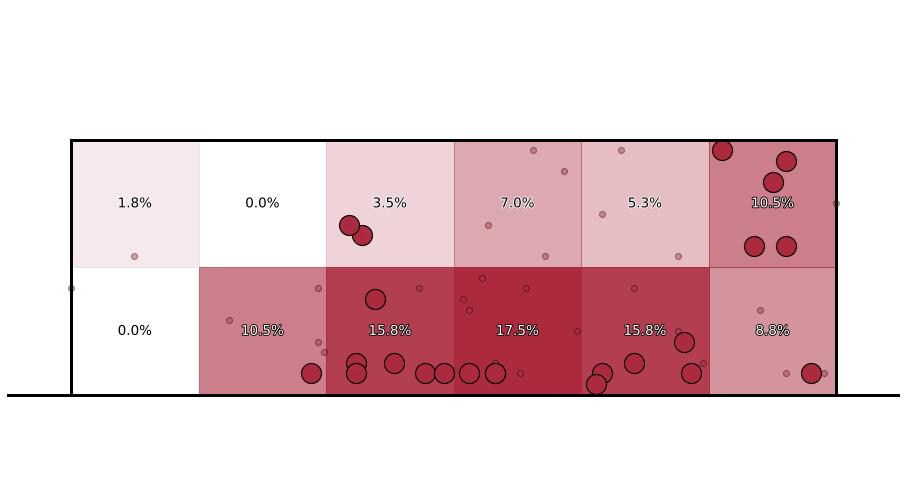

In [51]:
fig, ax = plt.subplots(figsize=(16,9))

width = 24
height = 8

increment_x = int(width / 6)
increment_y = int(height / 2)

tiros_arg['goalMouthY'] = tiros_arg['end_y'] - 32
tiros_arg['goalMouthY'] = [(x*width)/12.1 for x in tiros_arg['goalMouthY']]
tiros_arg['goalMouthZ'] = [(x*height)/2.4 for x in tiros_arg['end_z']]
tiros_arg[['goalMouthY', 'goalMouthZ']]

#Arco
ax.plot([0,0],[0,height], color = 'black', lw = 3)
ax.plot([width,width],[0,height], color = 'black', lw = 3)

ax.plot([0,width],[height,height], color = 'black', lw = 3)

#Logica para zonas
bins_y = range(0, width + 1, increment_x)
bins_z = range(0, height + 1, increment_y)
tiros_arg['bins_y'] = pd.cut(tiros_arg['goalMouthY'], bins_y)
tiros_arg['bins_z'] = pd.cut(tiros_arg['goalMouthZ'], bins_z)
tiros_arg['shot_aux'] = 1

data_bins = tiros_arg[['team','bins_y','bins_z','shot_aux']].groupby(['bins_y','bins_z','team'])['shot_aux'].sum().reset_index()
total_shots = tiros_arg.groupby(['team'])['shot_aux'].sum().reset_index()
total_shots.columns = ['team','total']
data_bins = pd.merge(data_bins,total_shots, how = 'left', on = 'team')
data_bins['shot_pct'] = data_bins['shot_aux']/data_bins['total']
data_bins = data_bins.sort_values(by = ['bins_y', 'bins_z'])
ax.axis('equal')

data = list(data_bins['shot_pct'])
max_data = max(data)
scaled_data = [x/max_data for x in data]

i = 0 
x = 0
while x < width:
    for y in range(0, height, increment_y):
        rect = patches.Rectangle(
                (x, y),  # bottom left starting position (x,y)
                increment_x,  # width
                increment_y,  # height
                ec='#ab2a3e',
                fc='#ab2a3e',
                alpha = scaled_data[i], # <---- the transparency
                zorder=-1
                )
    
        ax.add_patch(rect)
    
        # -- Anotate the counter (i) and choose color depending on value
        if scaled_data[i] < .5:
            color_text = 'black'
            fore_color ='white'
        else:
            color_text = 'white'
            fore_color = 'black'
        label_ = ax.text(
                    x = x + increment_x/2, y = y + increment_y/2,
                    s = f'{data[i]:.1%}', # <----- the data label
                    color = color_text,
                    va = 'center',
                    ha = 'center',
                    size = 13.5
                )
        # Set path effects to ensure readability
        label_.set_path_effects([Stroke(linewidth=1.7, foreground=fore_color), Normal()])
    
        i += 1
    
    # -- Once we've placed the top & bottom rectangles we move right.
    x = x + increment_x

ax.set_xlim(-2,width + 2)
ax.set_ylim(-2,height + 3)
ax.set_axis_off()
ax.plot([-2,width + 2],[0,0], color = 'black', marker = 'None', lw = 3, zorder = 3)

ax.scatter(tiros_arg['goalMouthY'], tiros_arg['goalMouthZ'], color = "#ab2a3e", alpha = 0.4, ec='black')
goles_tiros_arg = tiros_arg[tiros_arg['shot_outcome'] == 'Goal']
ax.scatter(goles_tiros_arg['goalMouthY'], goles_tiros_arg['goalMouthZ'], ec = "black", color = "#ab2a3e", alpha = 0.99, lw=1.15, s=400)
#plt.savefig('arco.png', dpi=300, bbox_inches='tight')

In [52]:
data_bins

,bins_y,bins_z,team,shot_aux,total,shot_pct
0,"(0, 4]","(0, 4]",Argentina,0,57,0.000000
1,"(0, 4]","(4, 8]",Argentina,1,57,0.017544
2,"(4, 8]","(0, 4]",Argentina,6,57,0.105263
3,"(4, 8]","(4, 8]",Argentina,0,57,0.000000
4,"(8, 12]","(0, 4]",Argentina,9,57,0.157895
5,"(8, 12]","(4, 8]",Argentina,2,57,0.035088
6,"(12, 16]","(0, 4]",Argentina,10,57,0.175439
7,"(12, 16]","(4, 8]",Argentina,4,57,0.070175
8,"(16, 20]","(0, 4]",Argentina,9,57,0.157895
9,"(16, 20]","(4, 8]",Argentina,3,57,0.052632
